In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [4]:
arrests = pd.read_csv('../data/Arrests_Assigned_250m.csv')
arrests['ARREST_DATE'] = pd.to_datetime(arrests['ARREST_DATE'])

In [222]:
len(arrests)

268320

In [5]:
len(arrests[arrests['ARREST_DATE'] >= datetime.datetime(2010, 1,1)])
arrests = arrests[arrests['ARREST_DATE'] >= datetime.datetime(2010, 1,1)]

In [220]:
arrests.columns

Index(['Unnamed: 0', 'ARREST_KEY', 'ARREST_DATE', 'ARREST_BORO',
       'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX',
       'PERP_RACE', 'Latitude', 'Longitude', 'geometry', 'line', 'name',
       'notes', 'objectid'],
      dtype='object')

In [100]:
len(arrests[(arrests.ARREST_DATE == datetime.date(2018, 12, 12))].groupby('objectid').get_group(15.0))

C:\Users\nicol\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


1

In [225]:
100*arrests.groupby('PERP_RACE').size()/len(arrests)

PERP_RACE
AMERICAN INDIAN/ALASKAN NATIVE     0.157010
ASIAN / PACIFIC ISLANDER           1.992223
BLACK                             56.271858
BLACK HISPANIC                     8.385629
UNKNOWN                            0.764509
WHITE                              7.259654
WHITE HISPANIC                    25.169116
dtype: float64

C:\Users\nicol\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


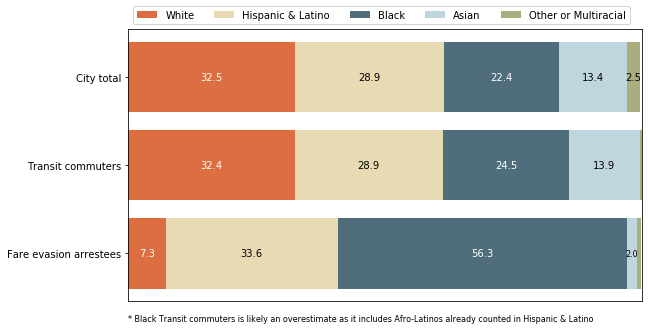

In [235]:
city_hisp = [28.90, 32.5, 13.4,22.4, 2.50] #Hisp, non-hisp white, Asian, non-hisp Black, other/multiracial
transit_hisp= [28.90, 32.40, 13.90, 24.500, 0.3]
arrests_hisp = [33.5546, 7.2596, 1.992, 56.271, 0.7645]

races = ['Hispanic & Latino', 'White', 'Asian', 'Black', 'Other or Multiracial']
labels = ['City total', 'Transit commuters', 'Fare evasion arrestees']         
hisp_data = np.array([city_hisp, transit_hisp, arrests_hisp]).T

race_colors = ["#dd6e42","#e8dab2","#4f6d7a","#c0d6df", "#AAAE7F"]


fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 100)

ax.barh(labels, hisp_data[1], label=races[1], color = race_colors[0])
text_color = 'white'
xlefts = hisp_data[1]
for y, (x, c) in enumerate(zip(xlefts/2, hisp_data[1])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color=text_color)

ax.barh(labels, hisp_data[0], label=races[0], left = xlefts, color = race_colors[1])
text_color = 'black'
xcenters = xlefts + hisp_data[0]/2
xlefts += hisp_data[0]
for y, (x, c) in enumerate(zip(xcenters, hisp_data[0])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color=text_color)

ax.barh(labels, hisp_data[3], label=races[3], left = xlefts, color = race_colors[2])
xcenters = xlefts + hisp_data[3]/2
xlefts += hisp_data[3] 
text_color='white'
for y, (x, c) in enumerate(zip(xcenters, hisp_data[3])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color=text_color)

ax.barh(labels, hisp_data[2], label=races[2], left = xlefts,  color = race_colors[3])
xcenters = xlefts + hisp_data[2]/2
xlefts += hisp_data[2]
text_color='black'
for y, (x, c) in enumerate(zip(xcenters, hisp_data[2])):
    if y >1:
        ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color=text_color, fontsize=8)
    else:
        ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color=text_color)


ax.barh(labels, hisp_data[4], label=races[4], left = xlefts,  color = race_colors[4])
xcenters = xlefts + hisp_data[4]/2
xlefts += hisp_data[4]
ax.text(xcenters[0], 0, str("{:.1f}".format(hisp_data[4][0])), ha='center', va='center',
    color=text_color)
ax.legend(ncol=len(races), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')
plt.gcf().text(0.125, 0.07, '* Black Transit commuters is likely an overestimate as it includes Afro-Latinos already counted in Hispanic & Latino', fontsize=8)
fig.show()
fig.savefig('../figures/Race.png', bbox_inches='tight')

Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)


In [228]:
100*arrests.groupby('ARREST_BORO').size()/len(arrests)

ARREST_BORO
B    22.922546
K    29.020519
M    37.604735
Q    10.452200
dtype: float64

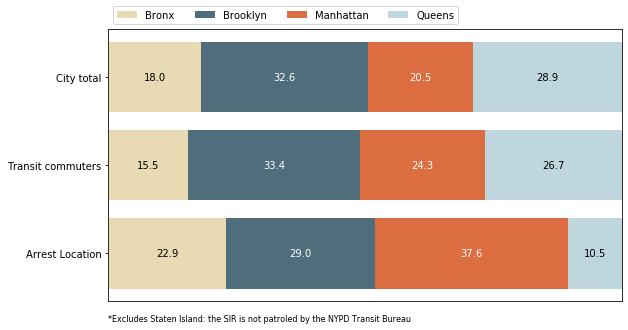

In [229]:
city_borough = [17.95712789, 32.62727579, 20.48596086, 28.92963546]
transit_borough = [15.52368915, 33.44169072, 24.33938595, 26.69523419]
arrests_borough = [22.922546, 29.020519, 37.604735, 10.452200]

boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens']
labels = ['City total', 'Transit commuters', 'Arrest Location']         
borough_data = np.array([city_borough, transit_borough, arrests_borough]).T

race_colors = ["#dd6e42","#e8dab2","#4f6d7a","#c0d6df","#eaeaea"]


fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 100)
ax.barh(labels, borough_data[0], label=boroughs[0], color = race_colors[1])
xlefts = borough_data[0]
for y, (x, c) in enumerate(zip(xlefts/2, borough_data[0])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='black')

ax.barh(labels, borough_data[1], label=boroughs[1], left = xlefts, color = race_colors[2])
xcenters = xlefts + borough_data[1]/2
xlefts += borough_data[1]
for y, (x, c) in enumerate(zip(xcenters, borough_data[1])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='white')

ax.barh(labels, borough_data[2], label=boroughs[2], left = xlefts, color = race_colors[0])
xcenters = xlefts + borough_data[2]/2
xlefts += borough_data[2]
for y, (x, c) in enumerate(zip(xcenters, borough_data[2])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='white')
ax.barh(labels, borough_data[3], label=boroughs[3], left = xlefts,  color = race_colors[3])
xcenters = xlefts + borough_data[3]/2

for y, (x, c) in enumerate(zip(xcenters, borough_data[3])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='black')
ax.legend(ncol=len(races), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')

plt.gcf().text(0.125, 0.07, '*Excludes Staten Island: the SIR is not patroled by the NYPD Transit Bureau', fontsize=8)
plt.show()
fig.savefig('../figures/Borough.png', bbox_inches='tight')

In [230]:
100*arrests.groupby('AGE_GROUP').size()/len(arrests)

AGE_GROUP
18-24    38.605982
25-44    36.213162
45-64    14.916970
65+       0.201032
<18      10.062853
dtype: float64

C:\Users\nicol\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


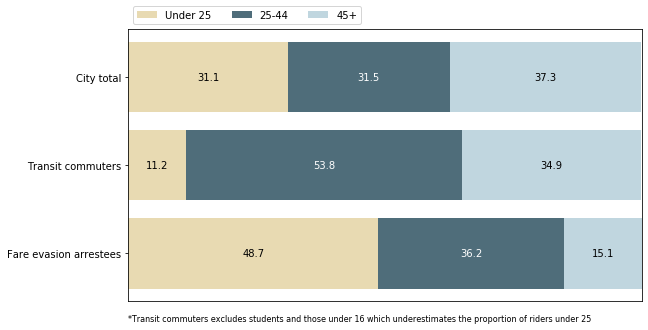

In [231]:
city_age = [31.1, 31.5, 37.3] #<25, 25-44, 45+
transit_age = [11.20, 53.80, 34.90]
arrests_age = [48.668835, 36.213162, 15.11800]

ages = ['Under 25', '25-44', '45+']
labels = ['City total', 'Transit commuters', 'Fare evasion arrestees']         
age_data = np.array([city_age, transit_age, arrests_age]).T

race_colors = ["#dd6e42","#e8dab2","#4f6d7a","#c0d6df","#eaeaea"]


fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 100)
ax.barh(labels, age_data[0], label=ages[0], color = race_colors[1])
xlefts = age_data[0]
for y, (x, c) in enumerate(zip(xlefts/2, age_data[0])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='black')

ax.barh(labels, age_data[1], label=ages[1], left = xlefts, color = race_colors[2])
xcenters = xlefts + age_data[1]/2
xlefts += age_data[1]
for y, (x, c) in enumerate(zip(xcenters, age_data[1])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='white')

ax.barh(labels, age_data[2], label=ages[2], left = xlefts, color = race_colors[3])

xcenters = xlefts + age_data[2]/2
for y, (x, c) in enumerate(zip(xcenters, age_data[2])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='black')
ax.legend(ncol=len(ages), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')

plt.gcf().text(0.125, 0.07, '*Transit commuters excludes students and those under 16 which underestimates the proportion of riders under 25', fontsize=8)

fig.show()
fig.savefig('../figures/Age.png', bbox_inches='tight')

In [232]:
100*arrests.groupby('PERP_SEX').size()/len(arrests)

PERP_SEX
F    11.202035
M    88.797965
dtype: float64

C:\Users\nicol\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


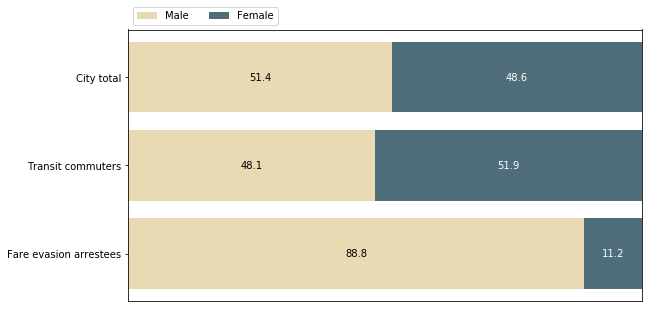

In [233]:
city_sex = [51.40, 48.60]#Male, Female
transit_sex = [48.10, 51.90]
arrests_sex = [88.797965, 11.202035]

sexes = ['Male', 'Female']
labels = ['City total', 'Transit commuters', 'Fare evasion arrestees']         
sex_data = np.array([city_sex, transit_sex, arrests_sex]).T

race_colors = ["#dd6e42","#e8dab2","#4f6d7a","#c0d6df","#eaeaea"]


fig, ax = plt.subplots(figsize=(9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, 100)
ax.barh(labels, sex_data[0], label=sexes[0], color = race_colors[1])
xlefts = sex_data[0]
for y, (x, c) in enumerate(zip(xlefts/2, sex_data[0])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='black')
ax.barh(labels, sex_data[1], label=sexes[1], left = sex_data[0], color = race_colors[2])
xcenters = xlefts + sex_data[1]/2
for y, (x, c) in enumerate(zip(xcenters, sex_data[1])):
    ax.text(x, y, str("{:.1f}".format(c)), ha='center', va='center',
            color='white')

ax.legend(ncol=len(ages), bbox_to_anchor=(0, 1),
          loc='lower left', fontsize='medium')
fig.show()
fig.savefig('../figures/Sex.png', bbox_inches='tight')

In [8]:
100*arrests.groupby('JURISDICTION_CODE').size()/len(arrests)

JURISDICTION_CODE
0.0     16.484049
1.0     82.846974
2.0      0.116652
3.0      0.178518
4.0      0.000373
6.0      0.308214
7.0      0.022734
15.0     0.016398
69.0     0.004100
97.0     0.021989
dtype: float64

In [9]:
100*arrests.groupby(['PERP_SEX', 'PERP_RACE','AGE_GROUP']).size()/len(arrests)

PERP_SEX  PERP_RACE                       AGE_GROUP
F         AMERICAN INDIAN/ALASKAN NATIVE  18-24        0.005590
                                          25-44        0.010063
                                          45-64        0.002982
                                          <18          0.001491
          ASIAN / PACIFIC ISLANDER        18-24        0.077147
                                                         ...   
M         WHITE HISPANIC                  18-24        9.213626
                                          25-44        8.976968
                                          45-64        2.662120
                                          65+          0.033915
                                          <18          2.516771
Length: 79, dtype: float64

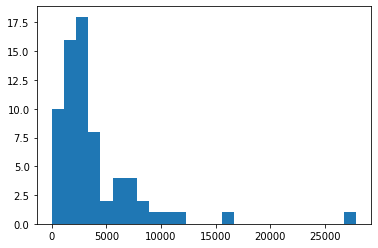

In [10]:
arrests.groupby('ARREST_PRECINCT').size().hist(grid=False, bins=25)

In [11]:
arrests.groupby('ARREST_PRECINCT').size().sort_values()

ARREST_PRECINCT
105        1
45       229
102      262
66       350
50       376
       ...  
75      9196
25     10271
44     11576
40     15674
14     27879
Length: 69, dtype: int64

In [12]:
100*transit_arrests.groupby('PERP_SEX').size()/len(transit_arrests)

NameError: name 'transit_arrests' is not defined

In [ ]:
arrests['ARREST_DATE']= pd.to_datetime(arrests.ARREST_DATE)

In [ ]:
arrests.resample('Y', on='ARREST_DATE').size().plot()

In [ ]:
arrests.groupby('ARREST_BORO').resample('Y', on='ARREST_DATE').size().transpose().plot()

In [ ]:
borough_bound = gpd.read_file('../data/Borough Boundaries/geo_export_41525217-5b67-4551-bc27-812c6d74e598.shp')
subway_lines = gpd.read_file('../data/Subway Lines/geo_export_0bf20305-3c1e-4a7b-b2c2-36e2d97e538a.shp')

In [ ]:
gp_arrests = gp_arrests = gpd.GeoDataFrame(arrests[['ARREST_KEY', 'Latitude', 'Longitude', 'JURISDICTION_CODE']], geometry= [Point(x, y) for x, y in zip(arrests.Longitude, arrests.Latitude)])

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
ax.set_aspect('equal')
ax.set_xlim((-74.05, -73.75))
ax.set_ylim((40.54, 40.92))

borough_bound.plot(ax = ax, alpha=0.5, edgecolor='k',color='white')
subway_lines.plot(ax = ax, alpha=1)
gp_arrests.plot(ax = ax, color='k', markersize=8)

In [6]:
arrests.resample('Y', on='ARREST_DATE').size().iloc[4:]#.sum()

ARREST_DATE
2014-12-31    27029
2015-12-31    27134
2016-12-31    24620
2017-12-31    17660
2018-12-31     5994
Freq: A-DEC, dtype: int64

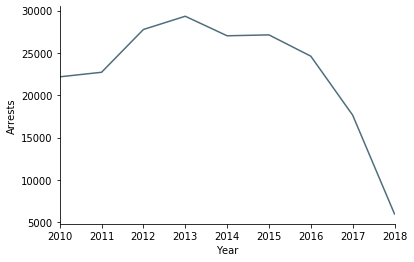

In [8]:
fig, ax = plt.subplots()
arrests.resample('Y', on='ARREST_DATE').size().plot(ax=ax, color="#4f6d7a")
ax.set_ylabel('Arrests')
ax.set_xlabel('Year')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('../figures/Arrests_per_year.png', bboxinches='tight')
